In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from computations.constants.periods import Period
from computations.payments import compute_monthly_payment
pd.options.display.max_rows = None
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [15]:
payments = [
    compute_monthly_payment(
        principal=140000,
        yearly_rate=0.0225,
        duration=180,
        extra_payment=0,
        extra_payment_period=Period.MONTH,
        special_payment={},
        initial_escrow=160,
        escrow_growth_rate=0.01,
        escrow_period=Period.TRIMESTER,
    ),
    compute_monthly_payment(
        principal=140000,
        yearly_rate=0.0225,
        duration=180,
        extra_payment=0,
        extra_payment_period=Period.MONTH,
        special_payment={
            12: 5000,
            24: 5000
        },
        initial_escrow=160,
        escrow_growth_rate=0.01,
        escrow_period=Period.TRIMESTER,
    ),
]


In [6]:
payments[0].head(3).T

0          1          2
month_number                    0.00       1.00       2.00
n_months_remaining            179.00     178.00     177.00
standing_principal         139344.20  138687.18  138028.94
monthly_interest_expense      259.83     258.61     257.39
monthly_principal_expense     655.80     657.02     658.24
escrow                        160.00     160.00     160.00

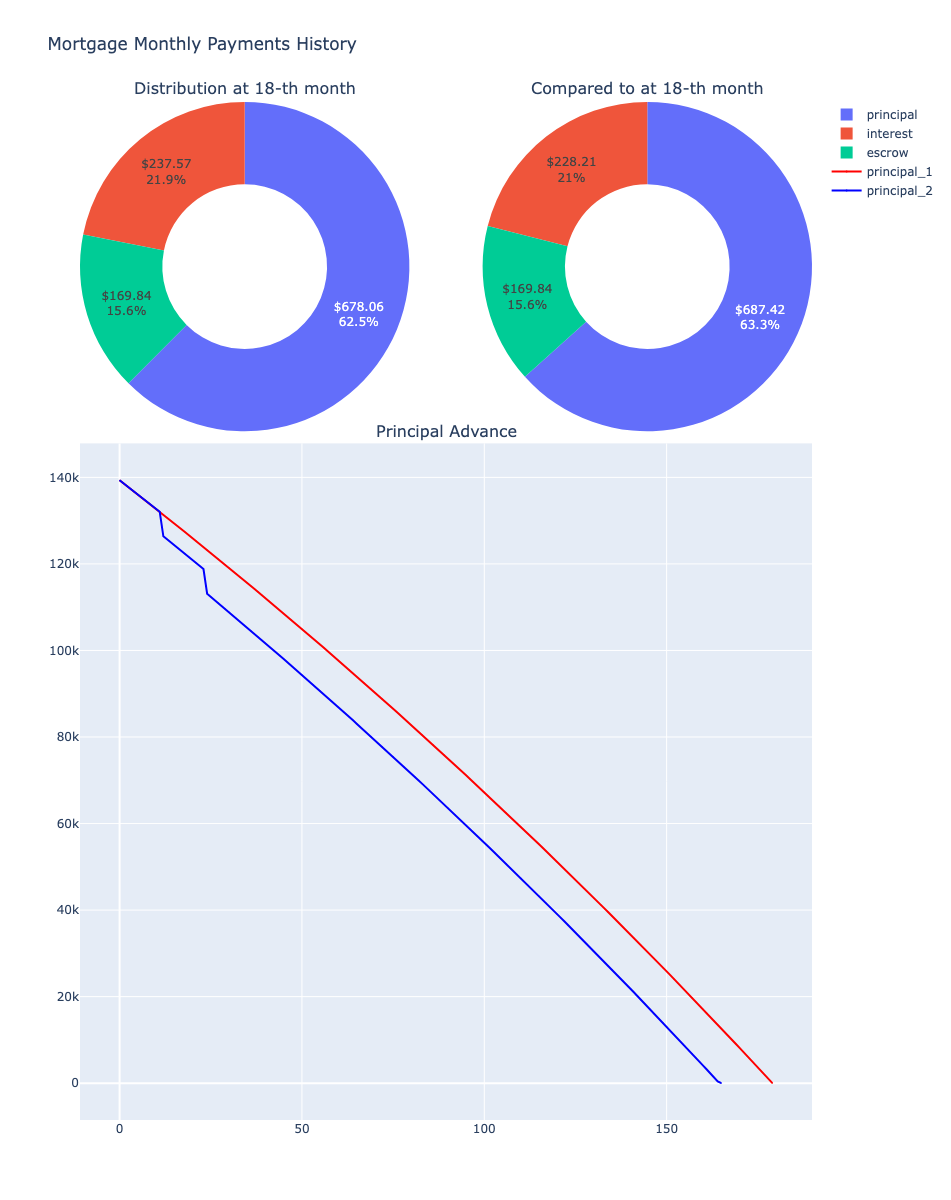

In [17]:
monthly_escrow = payments[0]['escrow']
monthly_principal = payments[0]['monthly_principal_expense']
monthly_interest = payments[0]['monthly_interest_expense']
standing_principal = payments[0]['standing_principal']

monthly_escrow1 = payments[1]['escrow']
monthly_principal1 = payments[1]['monthly_principal_expense']
monthly_interest1 = payments[1]['monthly_interest_expense']
standing_principal1 = payments[1]['standing_principal']

n_period = 18

fig = make_subplots(
    rows=3, cols=2, # use rowspan, colspan, domain
    specs=[
        [{'type': 'domain'}, {'type': 'domain'}], 
        [{'rowspan': 2, 'colspan': 2}, None],
        [None, None]
    ],
    shared_xaxes=False,
    shared_yaxes=False,
    vertical_spacing=0.01,
    subplot_titles=(
        f'Distribution at {n_period}-th month',
        f'Compared to at {n_period}-th month',
        'Principal Advance',
        None, None, None
    )
)

values = [
    monthly_escrow[n_period],
    monthly_principal[n_period],
    monthly_interest[n_period],
]

fig.add_trace(
    go.Pie(
        labels=['escrow', 'principal', 'interest'],
        values=values,
        text=[f'${value}' for value in values],
        hole=0.5
    ), row=1, col=1
)

values1 = [
    monthly_escrow1[n_period],
    monthly_principal1[n_period],
    monthly_interest1[n_period],
]

fig.add_trace(
    go.Pie(
        labels=['escrow', 'principal', 'interest'],
        values=values1,
        text=[f'${value}' for value in values1],
        hole=0.5
    ), row=1, col=2
)


fig.add_trace(
    go.Scatter(
        x=standing_principal.index,
        y=standing_principal,
        name='principal_1',
        mode='lines+markers',
        marker={'size': 1, 'color': 'Red'}
    ), row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=standing_principal1.index,
        y=standing_principal1,
        name='principal_2',
        mode='lines+markers',
        marker={'size': 1, 'color': 'Blue'}
    ), row=2, col=1
)


fig.update_layout(
    title="Mortgage Monthly Payments History",
    height=1200, width=1200
)
    

fig.show()

In [ ]:
65535, 2 ** 16
